# **GWU Doctoral Cyber Security Alaytics: Praxis Research**

# **A Holistic Approach to Enable Dynamic Policy Management for Zero Trust Architecure Implementations**

## Jody Spearing

## July 2025

## V3.5

##  **FFNN/MLP New Connection Classification Overview**

**Section 1:** Create Running Environment
*   Install / Import Libraries
*   Validate Runtime
* Load Data: create dataframe = df_0

**Section 2:** Basic Data Exploration on df_0

**Section 3:** Preprocessing on df_1

**Section 4:** Functions

**Section 5:** Model FFNN/MLP Clusters

**Section 6:** Calculate Metrics

**Section 7:** Display Visualizations

**Section 8:** Analyze Results

# **Section 1: Install / Import Libraries**

In [ ]:
######################################################################################################################
# Install Necessary Libraries
######################################################################################################################

!apt-get -y install cuda
!pip install pycuda # Moved before cuda-python
!pip install cuda-python
!pip install cudf-cu11
#!pip install --upgrade rmm
#!pip install cupy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cpp-12 cuda-12-9 cuda-cccl-12-9 cuda-command-line-tools-12-9
  cuda-compiler-12-9 cuda-crt-12-9 cuda-cudart-12-9 cuda-cudart-dev-12-9
  cuda-cuobjdump-12-9 cuda-cupti-12-9 cuda-cupti-dev-12-9 cuda-cuxxfilt-12-9
  cuda-demo-suite-12-9 cuda-documentation-12-9 cuda-driver-dev-12-9
  cuda-gdb-12-9 cuda-libraries-12-9 cuda-libraries-dev-12-9 cuda-nsight-12-9
  cuda-nsight-compute-12-9 cuda-nsight-systems-12-9 cuda-nvcc-12-9
  cuda-nvdisasm-12-9 cuda-nvml-dev-12-9 cuda-nvprof-12-9 cuda-nvprune-12-9
  cuda-nvrtc-12-9 cuda-nvrtc-dev-12-9 cuda-nvtx-12-9 cuda-nvvm-12-9
  cuda-nvvp-12-9 cuda-opencl-12-9 cuda-profiler-api-12-9 cuda-runtime-12-9
  cuda-sandbox-dev-12-9 cuda-sanitizer-12-9 cuda-toolkit-12-9
  cuda-toolkit-12-9-config-common cuda-tools-12-9 cuda-visual-tools-12-9
  dctrl-tools default-jre default-jre-headless dkms fakeroot fonts-dejav

In [ ]:
######################################################################################################################
## Import Python libraries
######################################################################################################################
# Import Base Libraries
import time
import os
import gc
import logging
import torch
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive
#import cudf
import cupy as cp
from math import comb
from psutil import virtual_memory
import tensorflow as tf
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#Clustering Libraries
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

#Clustering Metrics Libraries
from scipy.stats import entropy as scipy_entropy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix,
    top_k_accuracy_score, silhouette_score, davies_bouldin_score,
    calinski_harabasz_score, adjusted_rand_score,
    normalized_mutual_info_score, fowlkes_mallows_score,
    homogeneity_score, completeness_score, v_measure_score,
    pairwise_distances
)


# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# **Section 1: Validate Runtime**

In [ ]:
######################################################################################################################
# check CUDA version
######################################################################################################################
!nvidia-smi

#Use cudf.pandas as a magic
#%load_ext cudf.pandas

Fri May 16 23:37:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             52W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Section 1: Load Data: Original Dataframe = df_0**

In [ ]:
######################################################################################################################
# get / set working directory
# List Contents of working directory
######################################################################################################################

# Check if drive is already mounted before attempting to mount again
# Use force_remount=True to remount if it is already mounted.
import os
if not os.path.exists('/content/gdrive'):

    drive.mount('/content/gdrive', force_remount=True)
else:
    print("Drive is already mounted.")

!ls "/content/gdrive/My Drive/GWU/Praxis"

Mounted at /content/gdrive
data
requirements.txt
results
Spearing_Jody_Praxis_Draft_v04282025v2.docx
Spearing_Jody_Praxis_Draft_v04302025v2.docx
Spearing_Jody_Praxis_Draft_v05072025v2.docx
Spearing_Jody_Praxis_Draft_v05072025v4.docx
Spearing_Jody_Praxis_Draft_v05102025v2.docx
Spearing_Jody_Praxis_Draft_v05112025v2.docx
Spearing_Jody_Praxis_Draft_v05122025v2.docx
Spearing_Jody_Praxis_Draft_v05142025v2.docx
Spearing_Jody_Praxis_Draft_v05152025v2.docx
Spearing_Jody_Praxis_Draft_v05162025v2.docx


In [ ]:
######################################################################################################################
# Load Data file into dataframe 'df_0' denoting original
# Define the path to the Google Drive directory where the dataset is stored
# Define the name of the dataset file
# Combine the path and filename into a full path to the data file
# Optional: Limit the number of rows read for testing large files (commented out)
# nRowsRead random sample used for testing
# Read the CSV file into a pandas DataFrame
# Optionally, you could use nrows=nRowsRead for testing large datasets
# Print the first few rows of the DataFrame to verify that the file was read correctly
# Handle case where the file path is incorrect or file is missing
# Handle case where the CSV file has formatting issues and can't be parsed
# Catch any other unexpected exceptions and print the error message
######################################################################################################################

drive_path = '/content/gdrive/My Drive/GWU/Praxis/data/'
data = 'Dataset-Unicauca-Version2-87Atts 2.csv'

results_path = '/content/gdrive/My Drive/GWU/Praxis/results/'
results_data = 'FFNN_Label_Encoder_Results20250506_184706.csv'
data_file = drive_path + data
results_data_file = results_path + results_data
nRowsRead = 1_000_000


try:
  # load full file
  df_0 = pd.read_csv(data_file)
  results_df = pd.read_csv(results_data_file)

  # Load random Sample
  df_sampled = df_0.sample(n=nRowsRead, random_state=42)

  print(df_0.shape)
  print(df_sampled.shape)
  #print(df.head()) # Print the first few rows to verify

  print(results_df.shape)
  print(results_df.head())

except FileNotFoundError:
  print(f"Error: File not found at {data_file}")
except pd.errors.ParserError:
  print(f"Error: Unable to parse the file at {data_file}. Check file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

Error: File not found at /content/gdrive/My Drive/GWU/Praxis/data/Dataset-Unicauca-Version2-87Atts 2.csv


In [ ]:
######################################################################################################################
# Write results csv file to drive
######################################################################################################################

def write_labeled_df_tocsv_timestamp(output_file, output_dir, timestamp):

  try:
    print("Writing the file to ..." + output_dir)
    df_0.to_csv(output_path, index=False)
    print(f"Dataset written with shape: {df_0.shape}")

  except FileNotFoundError:
      print(f"Error: File not found at {output_dir}")
      return []
  except pd.errors.ParserError:
      print(f"Error: Unable to parse the file at {output_dir}. Check the file format.")
      return []
  except Exception as e:
      print(f"An unexpected error occurred: {e}")
      return []

In [ ]:
df = df_0.copy()
df.shape
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
# Group and aggregate
unique_destinations = (
    df.groupby('Destination.IP')
      .agg({
          'Destination.Port': lambda x: sorted(set(x)),
          'ProtocolName': lambda x: sorted(set(x))
      })
      .reset_index()
)

# Show the results
unique_destinations.head(100)

       Destination.IP                            Destination.Port ProtocolName
0         10.11.12.13                                        [80]       [HTTP]
1        10.120.1.191                                     [50680]       [HTTP]
2        10.130.0.157         [56398, 56399, 56405, 56408, 56413]       [HTTP]
3       10.130.10.101  [50467, 57486, 62911, 62937, 62938, 62939]       [HTTP]
4       10.130.10.176                                     [51034]       [HTTP]
...               ...                                         ...          ...
22819   98.158.99.149                                       [443]        [SSL]
22820   99.198.101.26                                       [443]        [SSL]
22821  99.198.108.197                                        [80]       [HTTP]
22822  99.198.117.213                                   [80, 443]  [HTTP, SSL]
22823  99.198.117.244                                        [80]       [HTTP]

[22824 rows x 3 columns]


In [ ]:
unique_destinations.head(100)

,Destination.IP,Destination.Port,ProtocolName
0,10.11.12.13,[80],[HTTP]
1,10.120.1.191,[50680],[HTTP]
2,10.130.0.157,"[56398, 56399, 56405, 56408, 56413]",[HTTP]
3,10.130.10.101,"[50467, 57486, 62911, 62937, 62938, 62939]",[HTTP]
4,10.130.10.176,[51034],[HTTP]
...,...,...,...
95,10.230.1.247,[80],[HTTP]
96,10.230.1.250,"[49236, 49364, 49401, 49680, 50107, 50243, 50375]","[GOOGLE, HTTP, HTTP_PROXY]"
97,10.230.1.251,"[55472, 59246]",[HTTP]
98,10.230.1.253,"[49557, 50283, 50349, 51047, 51221, 51323, 524...","[GOOGLE, HTTP, HTTP_PROXY]"


X_train.shape=  (4596, 78)
X_val.shape=  (1970, 78)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


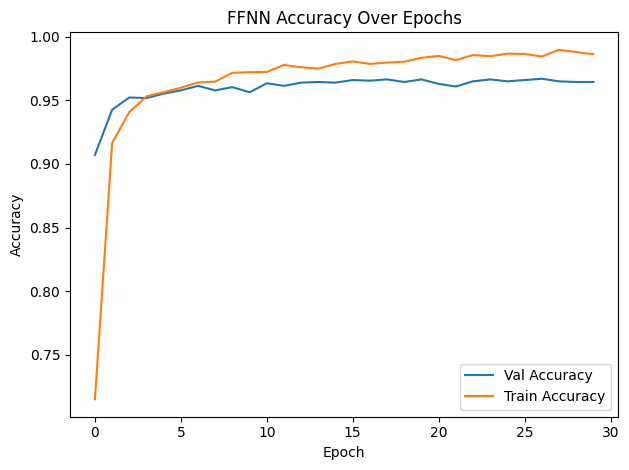

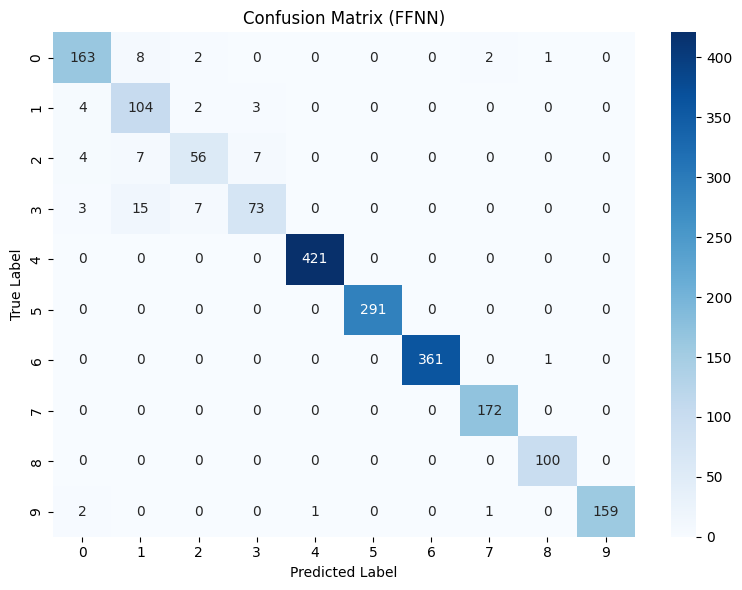

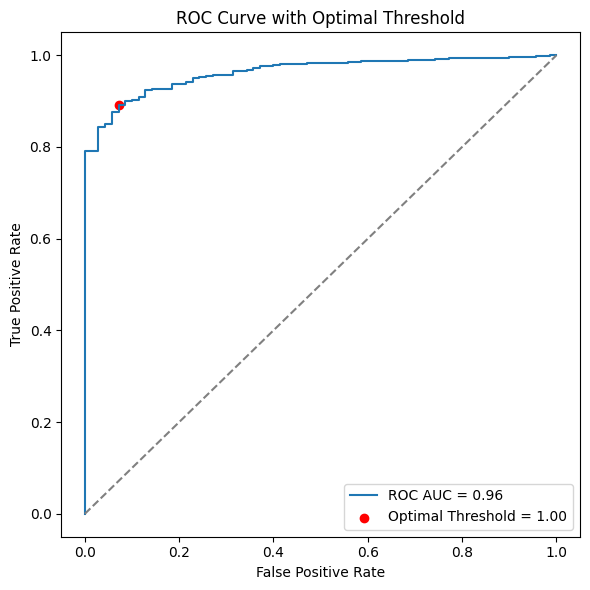

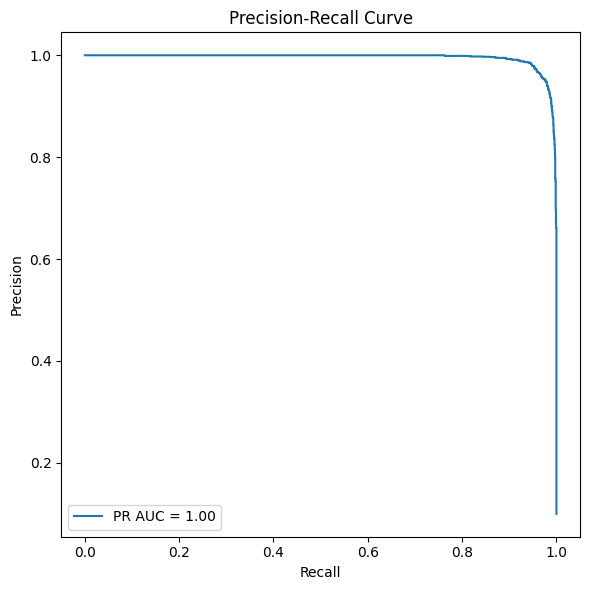

📁 FFNN evaluation results saved to 'ffnn_evaluation_metrics.csv'
             Timestamp Model  Accuracy  Precision    Recall  F1 Score  \
0  2025-05-16T23:39:38  FFNN  0.964467     0.9654  0.964467  0.964206   

    ROC AUC    PR AUC  Top-3 Accuracy       ARI  ...       FPR       TNR  \
0  0.998248  0.995366        0.999492  0.965711  ...  0.071429  0.928571   

        FNR    TP  FP  TN   FN  Avg Entropy  Avg Coherence  Optimal Threshold  
0  0.108947  1693   5  65  207     0.042891       0.737866           0.995383  

[1 rows x 21 columns]


In [ ]:
# Feed Forward Neural Network (FFNN) / MLP model evaluation with ROC, PR curves, and full metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix,
    top_k_accuracy_score, adjusted_rand_score, roc_curve
)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy.stats import entropy as scipy_entropy
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Prepare data
ip_protocol_matrix = pd.crosstab(df['Source.IP'], df['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Use AHC or manual clustering labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_labels, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

print('X_train.shape= ', X_train.shape)
print('X_val.shape= ', X_val.shape)

# Step 2: Build FFNN / MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_data=(X_val, y_val_cat), verbose=0)

# Step 3: Evaluate model
probs = model.predict(X_val)
y_pred = probs.argmax(axis=1)
y_true = y_val.values

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(to_categorical(y_true), probs, multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(to_categorical(y_true).ravel(), probs.ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs, k=3)
cm = confusion_matrix(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Binary evaluation using confidence threshold
confidences = probs.max(axis=1)
correct_mask = (y_true == y_pred).astype(int)
fpr, tpr, thresholds = roc_curve(correct_mask, confidences)
roc_auc_bin = auc(fpr, tpr)

youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

threshold = optimal_threshold
binary_preds = (confidences >= threshold).astype(int)
cm_bin = confusion_matrix(correct_mask, binary_preds)
fp = cm_bin[0, 1]
tn = cm_bin[0, 0]
fn = cm_bin[1, 0]
tp = cm_bin[1, 1]
fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

# Step 4: Entropy and Coherence
row_entropies = scipy_entropy(probs.T)
avg_entropy = np.mean(row_entropies)
X_val_df = X_val.copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Step 5: Plot and save evaluation results
os.makedirs("plots", exist_ok=True)

# Accuracy curve
plt.figure()
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('FFNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('plots/ffnn_accuracy_curve.png')
plt.close()

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (FFNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
plt.savefig("plots/ffnn_confmat.png")
plt.close()

# ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_bin:.2f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve with Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("plots/ffnn_roc_curve.png")
plt.close()

# PR Curve
plt.figure(figsize=(6, 6))
plt.plot(d_rec, d_prec, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("plots/ffnn_pr_curve.png")
plt.close()

# Step 6: Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'FFNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'ARI': ari,
    'TPR': tpr_rate,
    'FPR': fpr_rate,
    'TNR': tnr_rate,
    'FNR': fnr_rate,
    'TP': tp,
    'FP': fp,
    'TN': tn,
    'FN': fn,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence,
    'Optimal Threshold': optimal_threshold
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("ffnn_evaluation_metrics.csv", index=False)
print("📁 FFNN evaluation results saved to 'ffnn_evaluation_metrics.csv'")
print(results_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


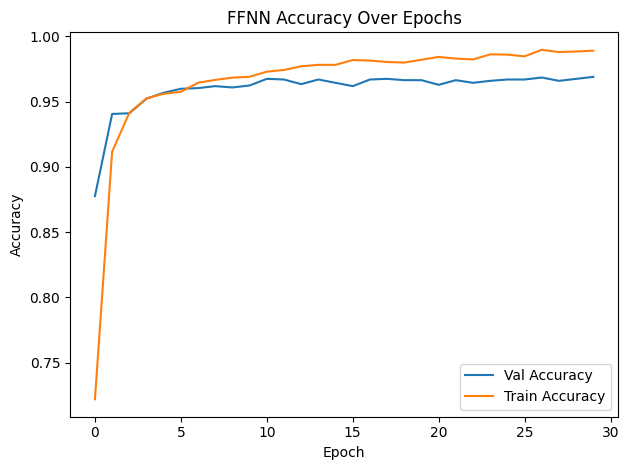

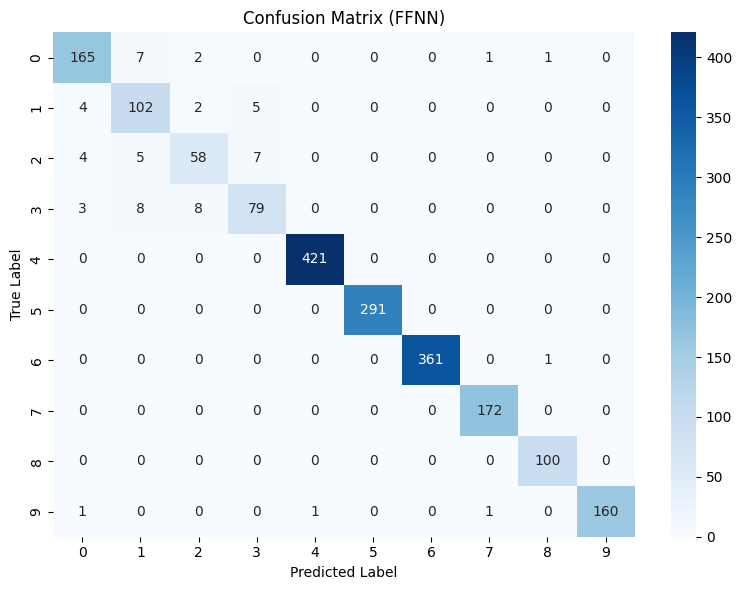

NameError: name 'tpr' is not defined

In [ ]:
# Feed Forward Neural Network (FFNN) / MLP model evaluation with full metrics including ARI, TPR, FPR, etc.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix,
    top_k_accuracy_score, adjusted_rand_score
)
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy.stats import entropy as scipy_entropy
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Prepare data
ip_protocol_matrix = pd.crosstab(df['Source.IP'], df['ProtocolName'])
ip_protocol_matrix = ip_protocol_matrix[ip_protocol_matrix.sum(axis=1) > 0]
X = (ip_protocol_matrix > 0).astype(int)

# Use AHC or manual clustering labels as targets
y_labels = pd.Series(fcluster(linkage(X, method='ward'), 10, criterion='maxclust') - 1, index=X.index)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_labels, test_size=0.3, random_state=42)
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

# Step 2: Build FFNN / MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_data=(X_val, y_val_cat), verbose=0)

# Step 3: Evaluate model
probs = model.predict(X_val)
y_pred = probs.argmax(axis=1)
y_true = y_val.values

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
roc_auc = roc_auc_score(to_categorical(y_true), probs, multi_class='ovr')
d_prec, d_rec, _ = precision_recall_curve(to_categorical(y_true).ravel(), probs.ravel())
pr_auc = auc(d_rec, d_prec)
topk_acc = top_k_accuracy_score(y_true, probs, k=3)
cm = confusion_matrix(y_true, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Binary evaluation using confidence threshold
confidences = probs.max(axis=1)
correct_mask = (y_true == y_pred).astype(int)
threshold = 0.5
binary_preds = (confidences >= threshold).astype(int)
cm_bin = confusion_matrix(correct_mask, binary_preds)
fp = cm_bin[0, 1]
tn = cm_bin[0, 0]
fn = cm_bin[1, 0]
tp = cm_bin[1, 1]
fpr_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
tpr_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr_rate = tn / (tn + fp) if (tn + fp) > 0 else 0

# Step 4: Entropy and Coherence
row_entropies = scipy_entropy(probs.T)
avg_entropy = np.mean(row_entropies)
X_val_df = X_val.copy()
X_val_df['Cluster'] = y_pred
coherence_scores = []
for label in np.unique(y_pred):
    cluster_vectors = X_val_df[X_val_df['Cluster'] == label].drop(columns=['Cluster'])
    if len(cluster_vectors) > 1:
        sim_matrix = cosine_similarity(cluster_vectors)
        upper_triangle = sim_matrix[np.triu_indices_from(sim_matrix, k=1)]
        coherence_scores.append(np.mean(upper_triangle))
    else:
        coherence_scores.append(0)
avg_coherence = np.mean(coherence_scores)

# Step 5: Plot and save evaluation results
os.makedirs("plots", exist_ok=True)
plt.figure()
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('FFNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('plots/ffnn_accuracy_curve.png')
plt.close()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (FFNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
plt.savefig("plots/ffnn_confmat.png")
plt.close()

# Step 6: Save results
metrics = {
    'Timestamp': datetime.now().isoformat(timespec='seconds'),
    'Model': 'FFNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc,
    'Top-3 Accuracy': topk_acc,
    'ARI': ari,
    'TPR': tpr_rate,
    'FPR': fpr_rate,
    'TNR': tnr_rate,
    'FNR': fnr_rate,
    'TP': tp,
    'FP': fp,
    'TN': tn,
    'FN': fn,
    'Avg Entropy': avg_entropy,
    'Avg Coherence': avg_coherence
}

results_df = pd.DataFrame([metrics])
results_df.to_csv("ffnn_evaluation_metrics.csv", index=False)
print("📁 FFNN evaluation results saved to 'ffnn_evaluation_metrics.csv'")
print(results_df)
